# 1.머신러닝 분류 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv",index_col=0)

In [41]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [42]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

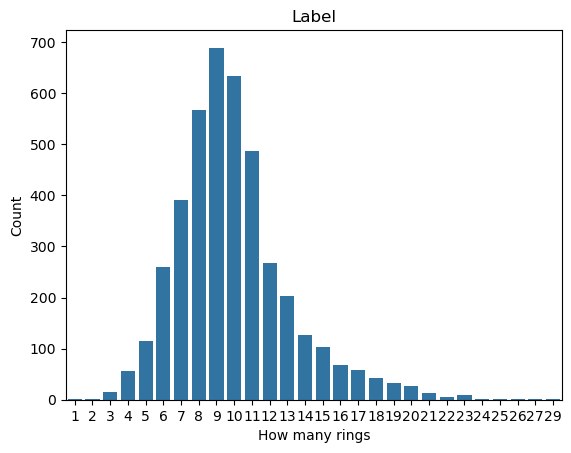

In [43]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("How many rings")
plt.ylabel("Count")
plt.title("Label")

In [44]:
# 결측치 확인
(df == 0).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [45]:
# 결측치 제거
# Outcome 열을 제외한 나머지 열에서 0이 포함된 행을 제거
df = df[(df!= 0).all(axis=1)]

# 결과 출력
print(df.shape)  # 0 값이 제거된 후의 데이터 크기 확인

(4175, 9)


In [56]:
# Sex 값을 F -> 0, M -> 1로 변환
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':-1})

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_9036/1774312253.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':-1})
/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_9036/1774312253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1, 'I':-1})


In [57]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


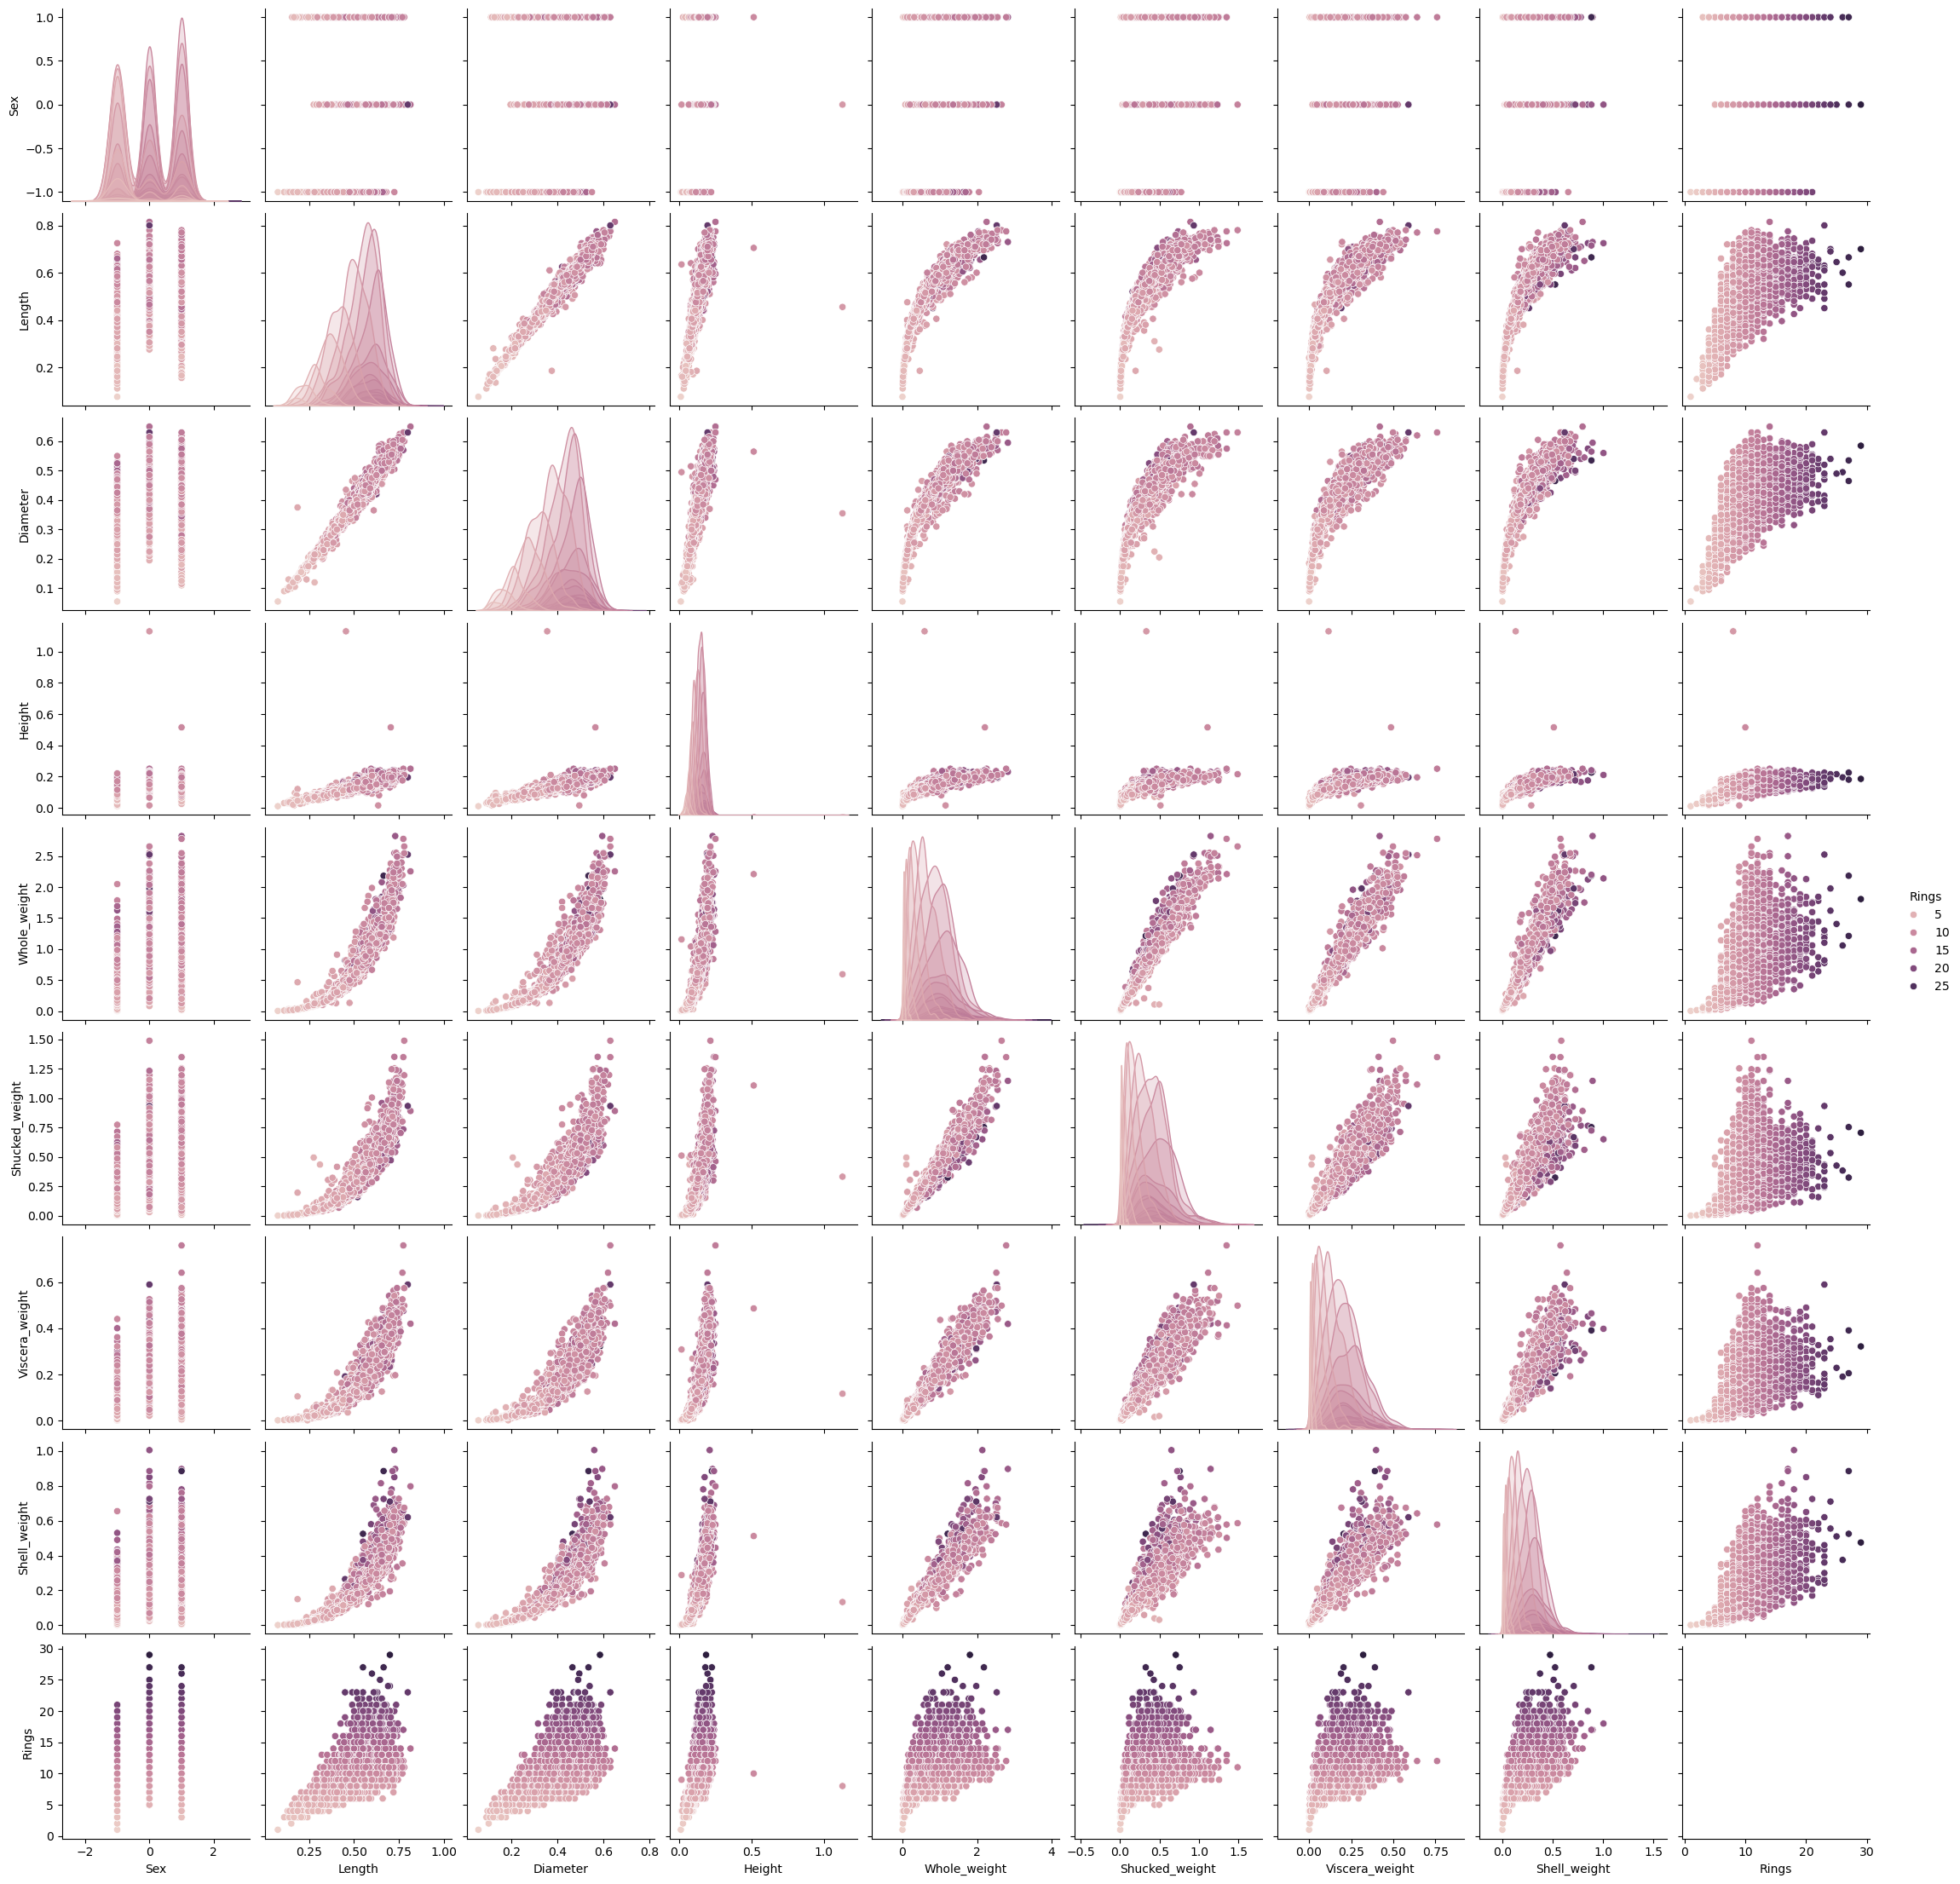

In [58]:
# pairplot사용해 각 상관관계 살피기
sns.pairplot(df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
            hue ='Rings')
plt.show()

/var/folders/nr/9d9y7mfn50b3sc_ncv28vstc0000gn/T/ipykernel_9036/2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


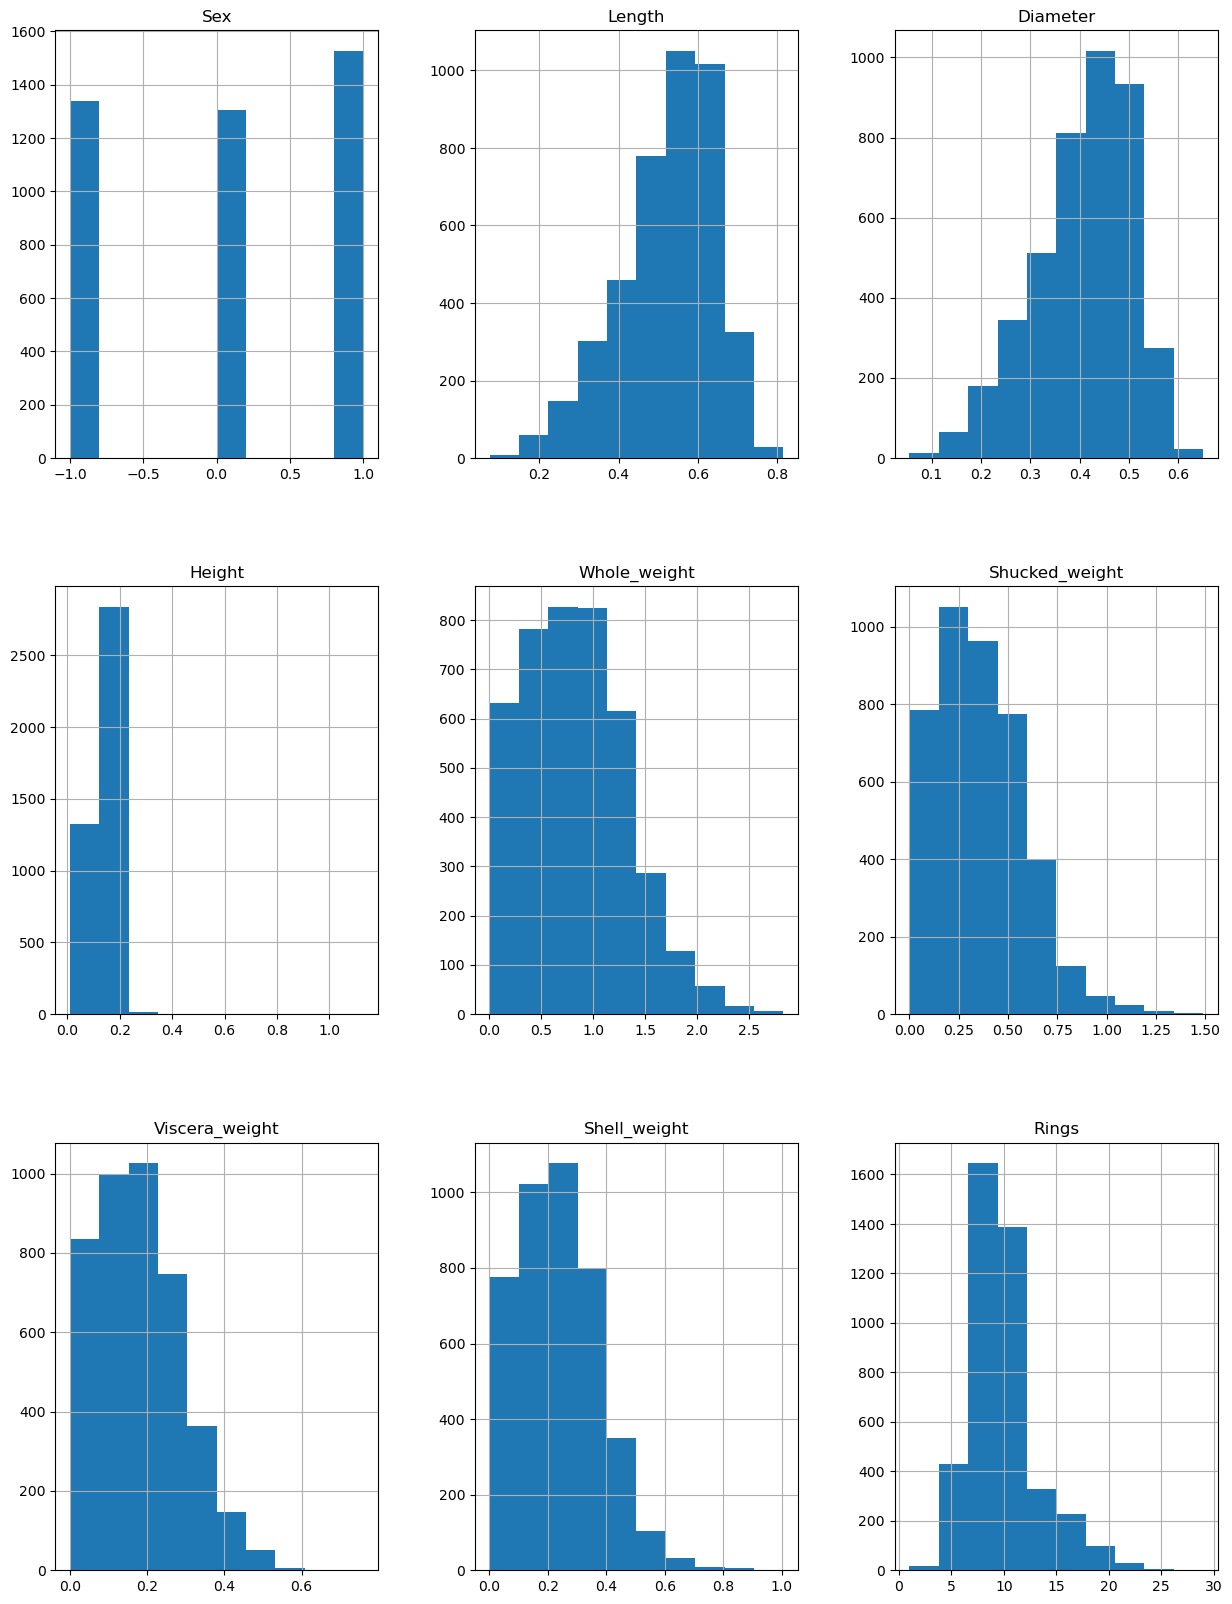

In [61]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [63]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [64]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [65]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [66]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.2595785440613027
[[ 0  3  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0 23  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 25 16  3  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24 32 17 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 16 47 66  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 25 93 33  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  9 96 48 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  7 56 35 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 41 14 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 21 12 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 17  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 12  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  

In [74]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.2595785440613027
[[ 0  1  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 24  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 22 21  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25 37 22 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7 23 49 55 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 28 76 44  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 16 66 60 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3 17 37 42 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  5 27 19 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  6 13 18 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 11 11  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 10  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 

In [75]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.26436781609195403
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  8 13  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1 20 24  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 19 42 18 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  6 25 40 63  8  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 11 22 83 34 14  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 11  7 78 40 28  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  6 53 28 34  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  3 24 21 18  0  2  0  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  9 15 15  0  3  0  2  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6 11  5  0  3  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 10  5  4  0  5  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  

In [77]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.20306513409961685
[[ 0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  3  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  6  5 15  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2 19 16  9  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 18 29 26 15  4  1  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  2 14 18 43 23 22 14  4  1  1  2  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  5 11 35 37 36 20  8  6  3  2  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 17 22 30 34 33 12  9  3  2  0  2  0  1  2  0  1  0  0  0  0]
 [ 0  0  0  2  7 16 19 25 25 11  7  3  4  4  1  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  3  4  9 16  9 10  7  4  3  4  2  0  1  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  6  6  9  5  5  4  4  2  2  2  1  1  2  0  0  1  0  0  0]
 [ 0  0  0  0  0  1  6  4  4  1  0  2  0  3  2  1  1  1  1  0  1  0  0  0]
 [ 0  0  0  0  2  5  4  1  3  3  4  1  0  0  1

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.23371647509578544
[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10 12  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4 18 21  5  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 30 24 32  9  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  9 24 50 40 13  2  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 12 37 46 38 24  5  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  5 22 48 47 28  7  4  2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3 11 28 41 29  6  3  0  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  8 20 17 16  6  3  1  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 0  0  0  0  1  7  5 16 10  3  6  2  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  3  7  7  2  1  4  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  5  7  2  1  1  0  0  1  1  0  0  0

# 2. 딥러닝 분류

In [80]:
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [ ]:
# 원 - 핫 인코딩

In [81]:
Y = pd.get_dummies(y).values

In [82]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080


In [83]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [113]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(28,activation='softmax'))

model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                90        
                                                                 
 dense_25 (Dense)            (None, 8)                 88        
                                                                 
 dense_26 (Dense)            (None, 6)                 54        
                                                                 
 dense_27 (Dense)            (None, 28)                196       
                                                                 
Total params: 428
Trainable params: 428
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_history=model.fit(x=X_train, y=y_train, epochs=35, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/35
105/105 [==============================] - 0s 1ms/step - loss: 3.0463 - accuracy: 0.1290 - val_loss: 2.7803 - val_accuracy: 0.1413
Epoch 2/35
105/105 [==============================] - 0s 604us/step - loss: 2.6777 - accuracy: 0.1482 - val_loss: 2.5516 - val_accuracy: 0.1437
Epoch 3/35
105/105 [==============================] - 0s 606us/step - loss: 2.5308 - accuracy: 0.1503 - val_loss: 2.4571 - val_accuracy: 0.1593
Epoch 4/35
105/105 [==============================] - 0s 595us/step - loss: 2.4567 - accuracy: 0.1743 - val_loss: 2.3991 - val_accuracy: 0.1749
Epoch 5/35
105/105 [==============================] - 0s 616us/step - loss: 2.4048 - accuracy: 0.1880 - val_loss: 2.3539 - val_accuracy: 0.1904
Epoch 6/35
105/105 [==============================] - 0s 622us/step - loss: 2.3642 - accuracy: 0.2051 - val_loss: 2.3195 - val_accuracy: 0.1964
Epoch 7/35
105/105 [==============================] - 0s 615us/step - loss: 2.3331 - accuracy: 0.2153 - val_loss: 2.2928 - val_accuracy: 0

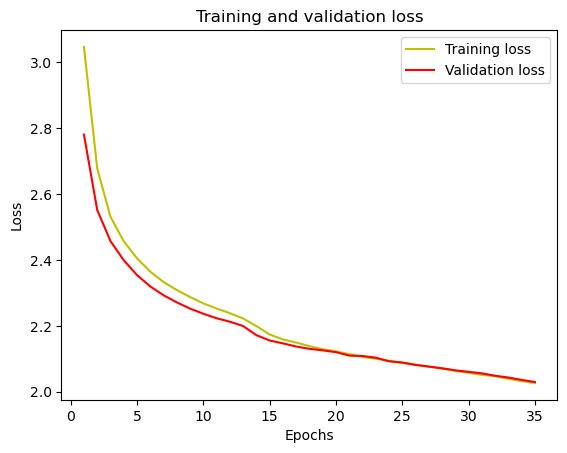

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

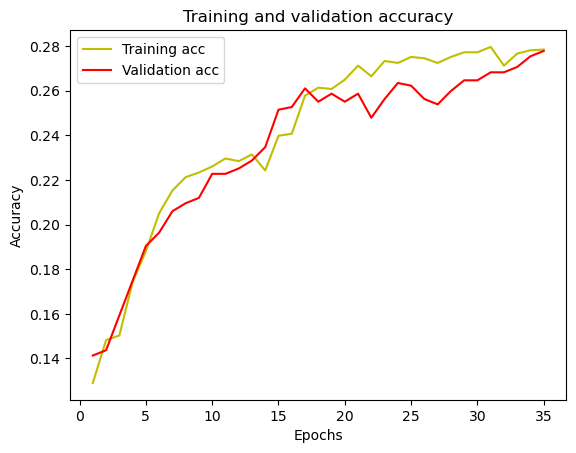

In [116]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [117]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.15      0.22      0.18         9
           4       0.62      0.29      0.39        28
           5       0.27      0.28      0.28        43
           6       0.40      0.45      0.42        82
           7       0.29      0.33      0.31       110
           8       0.25      0.47      0.33       131
           9       0.30      0.34      0.32       144
          10       0.18      0.26      0.22       100
          11       0.00      0.00      0.00        58
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         7
          19       0.00    

# 3. 머신러닝 회귀

In [118]:
from scipy import stats  # 과학용 계산 라이브러리

In [119]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


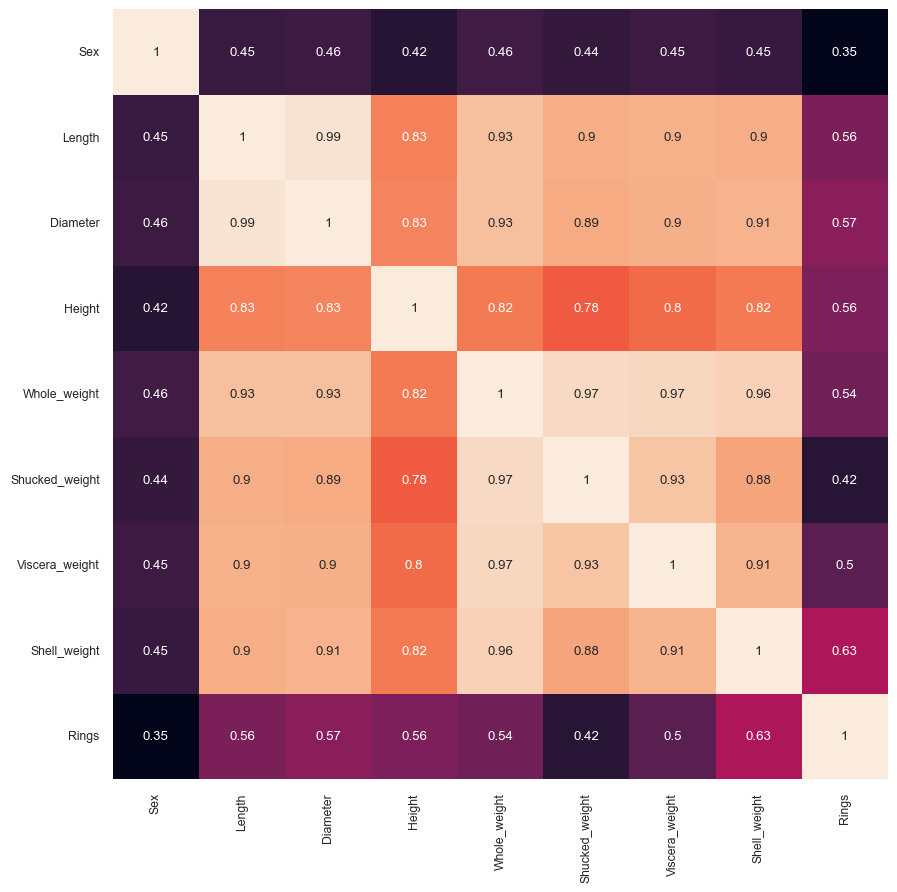

In [120]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Rings 와 높은 건 Shell weight

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
X = df.drop(['Rings'] ,axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,-1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [129]:
from sklearn.model_selection import train_test_split

y = df['Rings']  # 'Rings' 열을 레이블로 설정
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3340, 8) (3340,)
(835, 8) (835,)


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.0564832394330175
평균제곱근오차 5.0564832394330175
평균제곱근오차 5.0564832394330175


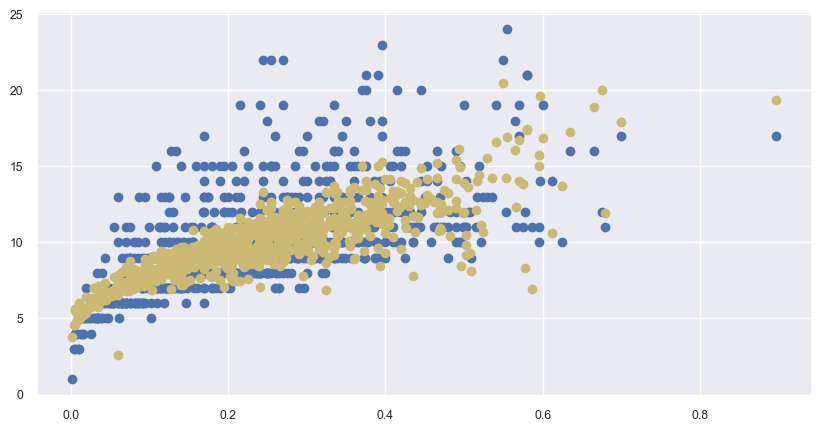

In [131]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [132]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 9.180838323353294


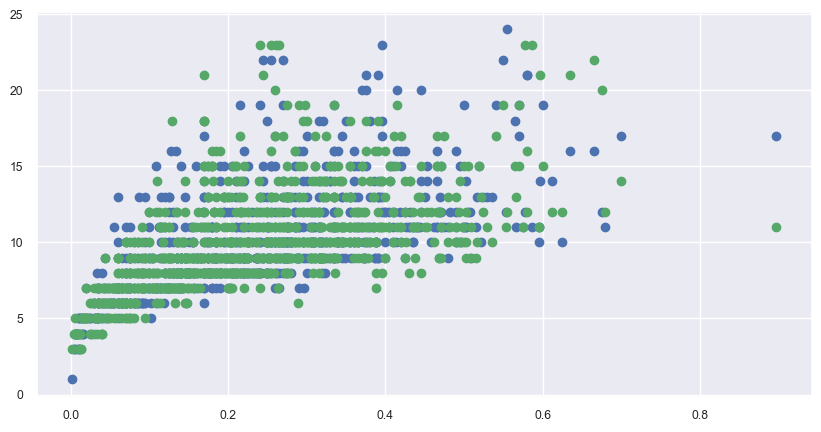

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [134]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.923253413173653


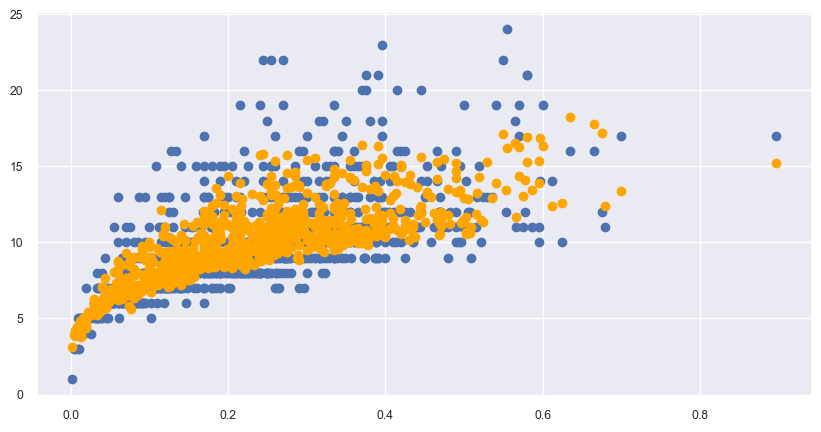

In [136]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()      

In [137]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.674637432398464


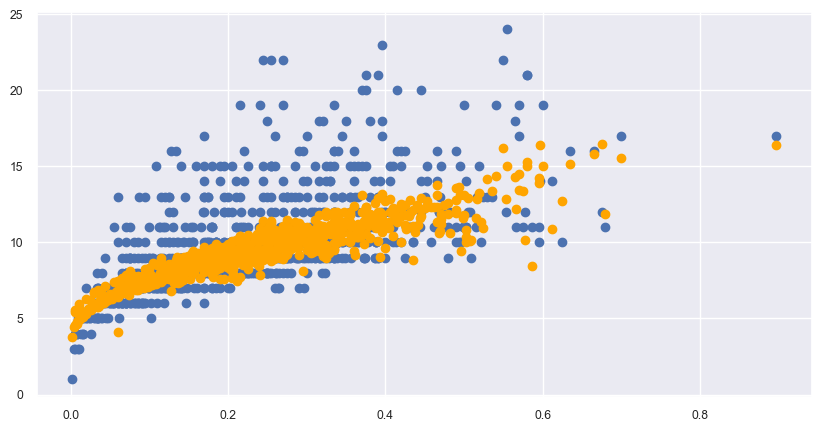

In [139]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show()    

# 4. 딥러닝 회귀

In [140]:
y = df["Rings"]
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [141]:
# one-hot encoding

Y = pd.get_dummies(y).values

In [142]:
# 딥러닝을 위해 numpy로 변환

X = X.values

In [143]:
X

array([[1.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [1.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [1.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [1.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [144]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [146]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3340, 8), (3340, 28), (835, 8), (835, 28))

In [151]:
# 모델 정의 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 30)                270       
                                                                 
 dense_38 (Dense)            (None, 30)                930       
                                                                 
 dense_39 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,303
Trainable params: 1,303
Non-trainable params: 0
_________________________________________________________________


In [152]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 [==============================] - 0s 1ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2/10
105/105 [==============================] - 0s 615us/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 3/10
105/105 [==============================] - 0s 1ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 4/10
105/105 [==============================] - 0s 663us/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/10
105/105 [==============================] - 0s 657us/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 6/10
105/105 [==============================] - 0s 647us/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 7/10
105/105 [==============================] - 0s 644us/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 8/10
105/105 [==============================] - 0s 634us/ste

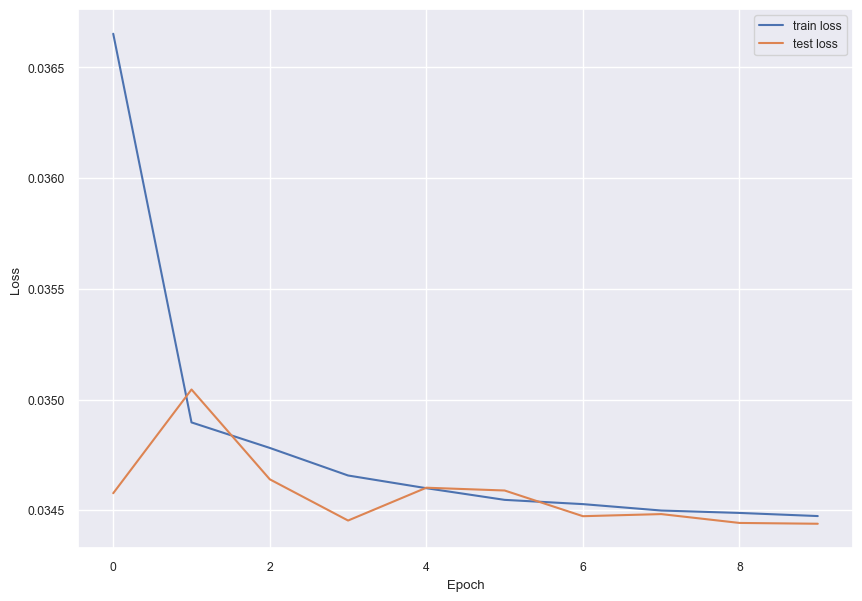

In [153]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [154]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 433us/step - loss: 0.0344 - mse: 0.0344


[0.03443901613354683, 0.03443901613354683]